# Inertial data

In [1]:
from scipy.io import loadmat
import os
os.chdir("/Users/qy/Desktop/sense_making/data/")

filename = 'Inertial/a7_s1_t1_inertial.mat'
mat = loadmat(filename)
type(mat)

dict

In [16]:
# can be dif rows !!
mat['d_iner'].shape

(178, 6)

In [14]:
mat['d_iner'][1:5,:]

array([[-0.979492, -0.287354, -0.040771, -0.946565, -0.70229 , -0.366412],
       [-0.977783, -0.283936, -0.034668,  0.274809, -0.274809, -0.885496],
       [-0.97168 , -0.289307, -0.028564,  1.587786,  0.061069, -1.19084 ],
       [-0.962402, -0.283447, -0.024902,  2.167939,  0.335878, -1.40458 ]])

178


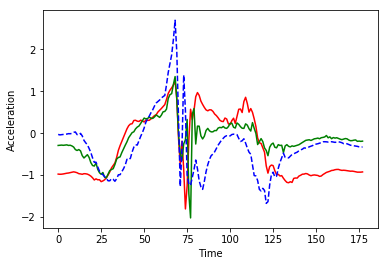

In [19]:
import matplotlib.pyplot as plt

t1 = mat['d_iner'][:,0]
t2 = mat['d_iner'][:,1]
t3 = mat['d_iner'][:,2]
print(len(t1))

plt.plot(t1, color = 'red')
plt.plot(t2, color = 'green')
plt.plot(t3, color = 'blue', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

# Skeleton data

In [21]:
filename = 'Skeleton/a7_s1_t1_skeleton.mat'
mat = loadmat(filename)
mat['d_skel'].shape

(20, 3, 66)

In [26]:
mat['d_skel'][:,:,5]

array([[ -9.52560604e-02,   4.97726887e-01,   2.85075426e+00],
       [ -9.69814584e-02,   3.08238208e-01,   2.87388015e+00],
       [ -8.46312940e-02,  -3.49410772e-02,   2.89260888e+00],
       [ -7.36773908e-02,  -9.99442041e-02,   2.86086416e+00],
       [ -2.55034745e-01,   1.92689344e-01,   2.87306547e+00],
       [ -2.98251927e-01,  -6.96190670e-02,   2.84974813e+00],
       [ -2.92104602e-01,  -3.02679807e-01,   2.81821465e+00],
       [ -2.82561213e-01,  -3.35064560e-01,   2.82096601e+00],
       [  7.50496686e-02,   2.12370262e-01,   2.94046140e+00],
       [  1.34881288e-01,  -6.55293018e-02,   2.94867086e+00],
       [  1.49878800e-01,  -2.93371350e-01,   2.87848687e+00],
       [  1.46016940e-01,  -3.87532890e-01,   2.84522891e+00],
       [ -1.43481895e-01,  -1.77379847e-01,   2.84245968e+00],
       [ -1.60816044e-01,  -6.42328322e-01,   2.93784595e+00],
       [ -1.19507082e-01,  -1.00501525e+00,   2.96586609e+00],
       [ -1.65111437e-01,  -1.06573725e+00,   2.9556498

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

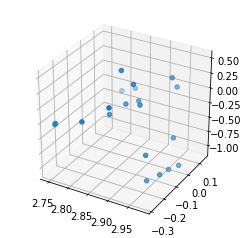

In [34]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

xs = mat['d_skel'][:,0,65]
ys = mat['d_skel'][:,1,65]
zs = mat['d_skel'][:,2,65]
ax.scatter(zs, xs, ys)
plt.show()

# Depth data

In [35]:
filename = 'Depth/a7_s1_t1_depth.mat'
mat = loadmat(filename)
mat['d_depth'].shape

(240, 320, 66)

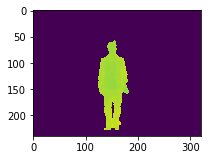

In [38]:
img = mat['d_depth'][:,:,50]

fig=plt.figure(figsize=(3, 4))
plt.imshow(img)
plt.show()

## Training data preparation
https://github.com/woo-chia-wei/kinect-sequence-classification/blob/master/activity_classification.ipynb

In [58]:
# Original inertial data has dimension (Number of sample) x 6
# Swap the axes so the new dimension is 6 x (Number of sample)
# Apply padding to each entry, the new dimension is 6 x 326
# Subjects 1, 2, 3, 5, 6, 7 go into training data (75%)
# Subjects 4, 8 go into test data (25%)

import numpy as np
from keras.preprocessing import sequence

X_train = []
Y_train = []
X_test = []
Y_test = []

for action in range(1, 28):
    # print(action)
    for subject in range(1, 9):
        for trial in range(1, 5):
            # data = import_inertial_data(action, subject, trial)
            filename = f'Inertial/a{action}_s{subject}_t{trial}_inertial.mat'
            try:
                data = loadmat(filename)['d_iner']
            except:
                continue
            
            # if data is None: continue
            data = np.swapaxes(data, 0, 1)
            data = sequence.pad_sequences(data, maxlen=326)
            if subject in [1, 2 ,3, 5, 6, 7] :
                X_train.append(data)
                Y_train.append(action-1)
            else:
                X_test.append(data)
                Y_test.append(action-1)
                
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (646, 6, 326)
Y_train.shape: (646,)
X_test.shape: (215, 6, 326)
Y_test.shape: (215,)


In [59]:
# One hot encoding
from keras.utils import to_categorical

X_train = np.swapaxes(X_train, 1, 2)
X_test = np.swapaxes(X_test, 1, 2)

Y_label = Y_test
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)
Y_label[:10]

X_train.shape: (646, 326, 6)
Y_train.shape: (646, 27)
X_test.shape: (215, 326, 6)
Y_test.shape: (215, 27)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Model 3
reference: https://blog.goodaudience.com/predicting-physical-activity-based-on-smartphone-sensor-data-using-cnn-lstm-9182dd13b6bc

In [37]:
from keras.layers import Activation, Dense

epochs = 20
kernel_size = 3 #kernel_size of 1 worked surprisingly well
pool_size = 2
dropout_rate = 0.15
f_act = 'relu'
n_classes = 27
batch_size = 128

model = Sequential()
model.add(Conv1D(512, (kernel_size), input_shape=X_train.shape[1:], 
                       activation=f_act, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(pool_size)))
model.add(Dropout(dropout_rate))
model.add(Conv1D(64, (kernel_size), activation=f_act, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(pool_size)))
model.add(Dropout(dropout_rate))
model.add(Conv1D(32, (kernel_size), activation=f_act, padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(pool_size)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(dropout_rate))

model.add(Dense(n_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    # validation_split=0.3, 
                    validation_data=(X_test, Y_test),
                    epochs=epochs, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 326, 512)          9728      
_________________________________________________________________
batch_normalization_11 (Batc (None, 326, 512)          2048      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 163, 512)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 163, 512)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 163, 64)           98368     
_________________________________________________________________
batch_normalization_12 (Batc (None, 163, 64)           256       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 81, 64)            0         
__________

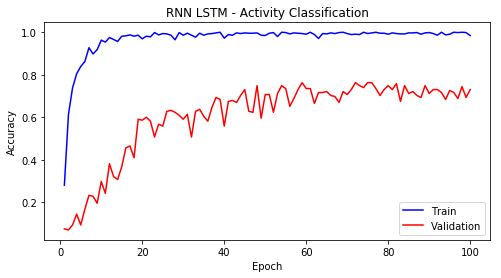

In [51]:
import matplotlib.pyplot as plt

epoch = list(range(1,101))
plt.figure(figsize=(8,4))
plt.plot(epoch, history.history['acc'], color='b')
plt.plot(epoch, history.history['val_acc'], color='r')
plt.title('RNN LSTM - Activity Classification')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Train', 'Validation'))
plt.show()

## Confusion matrix

In [55]:
pred = model.predict(X_test, batch_size=64, verbose = 2)
pred[5]

array([ 0.02730418,  0.02785297,  0.08428575,  0.08428878,  0.01734128,
        0.00627822,  0.0373209 ,  0.06257435,  0.05223769,  0.15470649,
        0.02986122,  0.00194985,  0.09882011,  0.02585078,  0.0697194 ,
        0.01213984,  0.02399773,  0.00796033,  0.03331059,  0.02903352,
        0.10080227,  0.00333209,  0.00091097,  0.00375817,  0.00146984,
        0.00187131,  0.00102146], dtype=float32)

In [56]:
y_class = pred.argmax(axis=-1)
y_class[:10]

array([ 8,  9, 12, 12,  1,  9,  9,  9,  9,  1])

In [62]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_label, y_class)
cnf_matrix.shape

(27, 27)

In [72]:
# https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model

import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


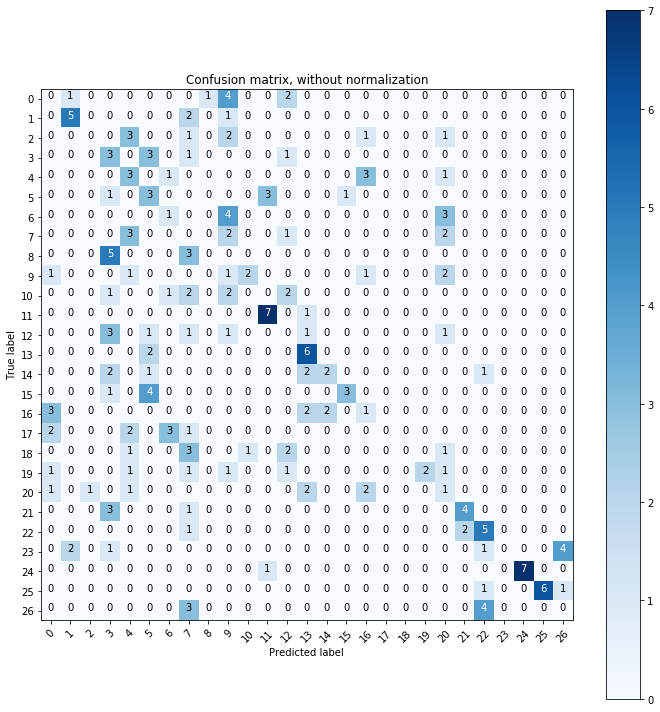

In [73]:
# Plot Model 2, to be renewed

class_names = list(range(27))

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()